In [1]:
!conda env list

# conda environments:
#
base                     E:\Anaconda3\Install
backend                  E:\Anaconda3\Install\envs\backend
cvt                      E:\Anaconda3\Install\envs\cvt
pytorch                  E:\Anaconda3\Install\envs\pytorch
tensorflow            *  E:\Anaconda3\Install\envs\tensorflow
                         E:\Oriange3



(208, 176)


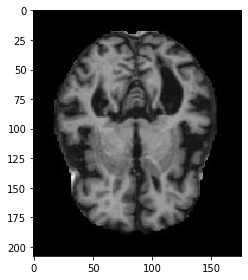

In [3]:
train_root  = "E:\\NTUAILab\\Data\Alzheimer\\Alzheimer_s Dataset\\train"
test_root = "E:\\NTUAILab\\Data\\Alzheimer\\Alzheimer_s Dataset\\test"

#if wanted to display image 
from skimage import io
image = io.imread("E:\\NTUAILab\\Data\\Alzheimer\\Alzheimer_s Dataset\\train\\MildDemented\\mildDem0.jpg")
print(image.shape)
io.imshow(image)

In [4]:
batch_size = 5

from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (150, 150), batch_size=batch_size, shuffle= False)
test_data = Generator.flow_from_directory(test_root, (150, 150), batch_size=batch_size, shuffle= False)


Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [5]:
#optional
print(train_data[0][0][0].shape)
# total 4317 data below to 5 clasess
print(len(train_data)) #4317/batch size
print(len(train_data[0])) #2, 1st image, 2nd is label
#print(train_data[0])
print(len(train_data[0][0])) #1st batch of 10 data
print(len(train_data[0][0][0])) #the image, the vertical
print(len(train_data[0][0][0][0])) #the image, the horizontal
print(len(train_data[0][0][0][0][0])) #the image, RGB


(150, 150, 3)
1025
2
5
150
150
3


4


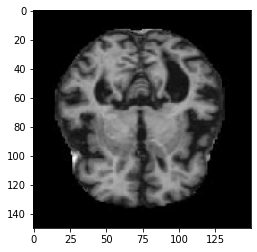

In [6]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][0]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

In [8]:
#remove optimizer if needed
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(train_data, batch_size = batch_size, epochs=2)


Epoch 1/2
1025/1025 [==============================] - 106s 101ms/step - loss: 2.8769 - accuracy: 0.4628
Epoch 2/2
1025/1025 [==============================] - 62s 60ms/step - loss: 1.0747 - accuracy: 0.4983


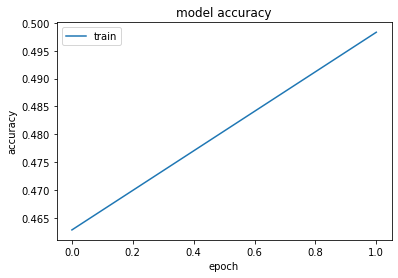

In [9]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



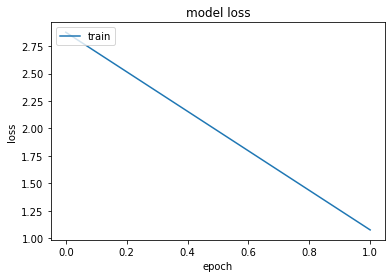

In [10]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:

# score = model.evaluate(train_data)
# print(score)
score = model.evaluate(test_data)
print(score)

256/256 [==============================] - 24s 92ms/step - loss: 1.0170 - accuracy: 0.5004
[1.0169862508773804, 0.5003909468650818]


In [12]:

import seaborn as sns

pred = model.predict_classes(test_data)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes, pred)
sns.heatmap(cm, annot=True)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
#depends on number of classes
print((cm[0,0]+cm[1,1])/(sum(sum(cm))))


from keras.models import save_model
save_model(model, "Pneumonia")